<a href="https://colab.research.google.com/github/JaviRute/Data-Science-Projects/blob/main/Day_72_Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv("QueryResults.csv", names=["DATE", "TAG", "POSTS"], header=0)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [ ]:
df.tail()

,DATE,TAG,POSTS
2323,2022-07-01 00:00:00,php,3906
2324,2022-07-01 00:00:00,python,22948
2325,2022-07-01 00:00:00,r,4246
2326,2022-07-01 00:00:00,ruby,457
2327,2022-07-01 00:00:00,swift,1794


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2328, 3)

In [ ]:
df.columns

Index(['DATE', 'TAG', 'POSTS'], dtype='object')

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()

DATE     2328
TAG      2328
POSTS    2328
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,40806
c,382559
c#,1548544
c++,770857
delphi,49824
go,62930
java,1854711
javascript,2399875
perl,66937


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,168,168
c,168,168
c#,169,169
c++,168,168
delphi,168,168
go,153,153
java,168,168
javascript,168,168
perl,168,168


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
df["DATE"][1]
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [ ]:
test_df = pd.DataFrame({"Age": ["Young", "Young", "Young", "Young", "Old", "Old", "Old", "Old"], 
                        "Actor": ["Jack", "Arnold", "Keanu", "Sylvester", "Jack", "Arnold", "Keanu", "Sylvester"],
                        "Power": [100, 80, 25, 50, 99, 75, 5, 30]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5
7,Old,Sylvester,30


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
test_df.shape

(8, 3)

In [ ]:
test_df.columns

Index(['Age', 'Actor', 'Power'], dtype='object')

In [ ]:
test_df.head()

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99


In [ ]:
pivoted_df = test_df.pivot(index="Age", columns="Actor", values="Power")
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75,99,5,30
Young,80,100,25,50


In [ ]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,159.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,250.0,2097.0,6466.0,3833.0,133.0,828.0,8082.0,16301.0,105.0,3754.0,24526.0,5082.0,527.0,2067.0
2022-04-01,266.0,1872.0,5938.0,3849.0,122.0,756.0,7829.0,15967.0,101.0,3812.0,23569.0,4773.0,492.0,1770.0
2022-05-01,287.0,1915.0,6289.0,3897.0,129.0,678.0,7869.0,16093.0,94.0,4024.0,23176.0,4840.0,502.0,1758.0


In [ ]:
reshaped_df.shape

(169, 14)

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,159.0,NaN


In [ ]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-03-01,250.0,2097.0,6466.0,3833.0,133.0,828.0,8082.0,16301.0,105.0,3754.0,24526.0,5082.0,527.0,2067.0
2022-04-01,266.0,1872.0,5938.0,3849.0,122.0,756.0,7829.0,15967.0,101.0,3812.0,23569.0,4773.0,492.0,1770.0
2022-05-01,287.0,1915.0,6289.0,3897.0,129.0,678.0,7869.0,16093.0,94.0,4024.0,23176.0,4840.0,502.0,1758.0
2022-06-01,247.0,1669.0,6125.0,3408.0,125.0,744.0,7080.0,15288.0,125.0,3862.0,22369.0,4418.0,482.0,1801.0
2022-07-01,216.0,1528.0,6080.0,3360.0,127.0,773.0,6764.0,15544.0,131.0,3906.0,22948.0,4246.0,457.0,1794.0


In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

TAG
assembly      168
c             168
c#            169
c++           168
delphi        168
go            153
java          168
javascript    168
perl          168
php           168
python        168
r             166
ruby          168
swift         160
dtype: int64

In [ ]:
reshaped_df = reshaped_df.fillna(0)
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,637.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,581.0,97.0,501.0,451.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,250.0,2097.0,6466.0,3833.0,133.0,828.0,8082.0,16301.0,105.0,3754.0,24526.0,5082.0,527.0,2067.0
2022-04-01,266.0,1872.0,5938.0,3849.0,122.0,756.0,7829.0,15967.0,101.0,3812.0,23569.0,4773.0,492.0,1770.0
2022-05-01,287.0,1915.0,6289.0,3897.0,129.0,678.0,7869.0,16093.0,94.0,4024.0,23176.0,4840.0,502.0,1758.0


In [ ]:
import matplotlib.pyplot as plt

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

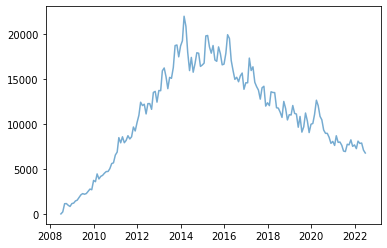

In [ ]:
plt.plot(reshaped_df.index, reshaped_df.java)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

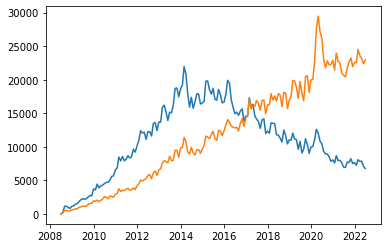

In [ ]:
plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

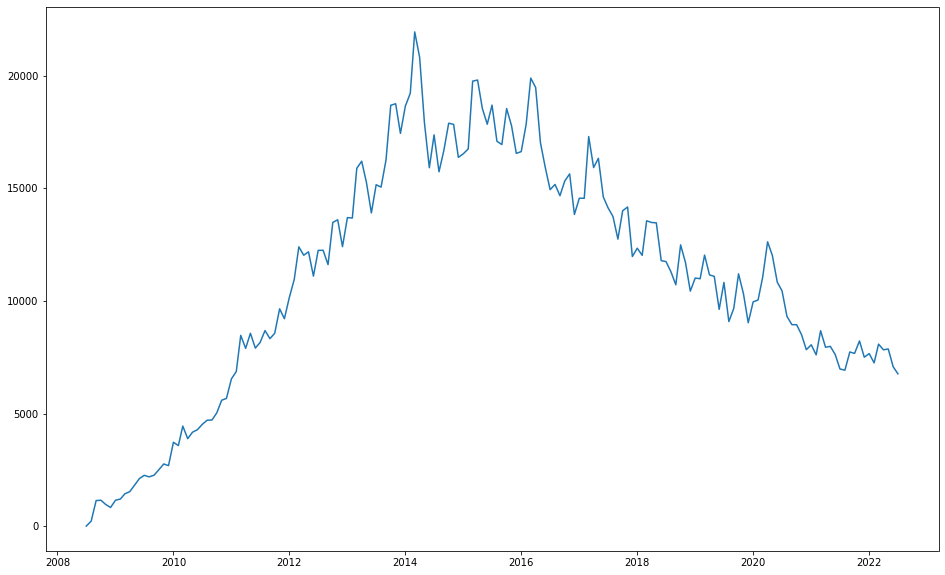

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(reshaped_df.index, reshaped_df.java)

The next few lines specify the font size for the markers of the x and y(35000, 3000, etc and also 2008, 2009, etc) and also give a title to these (Number of posts and Date)

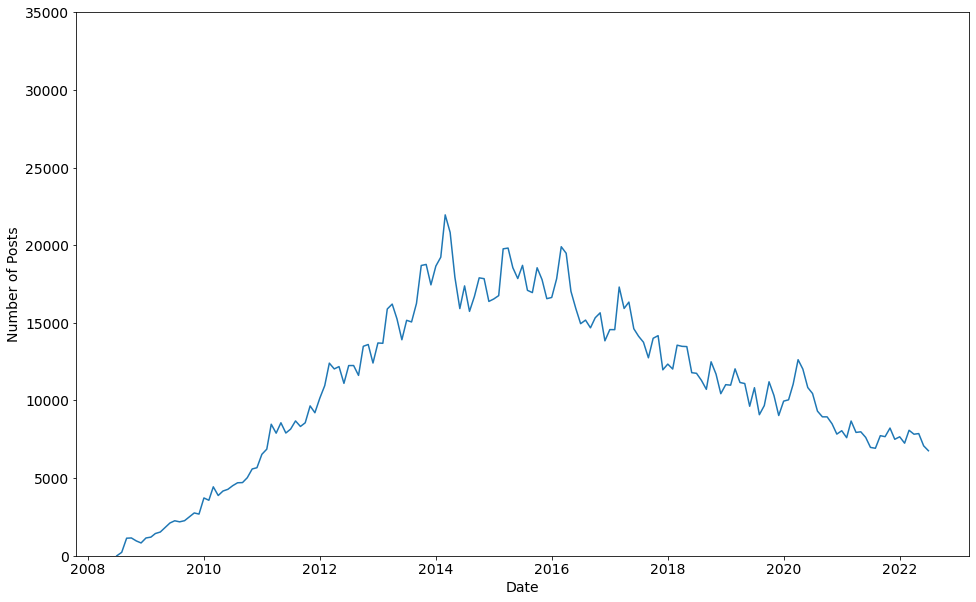

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)

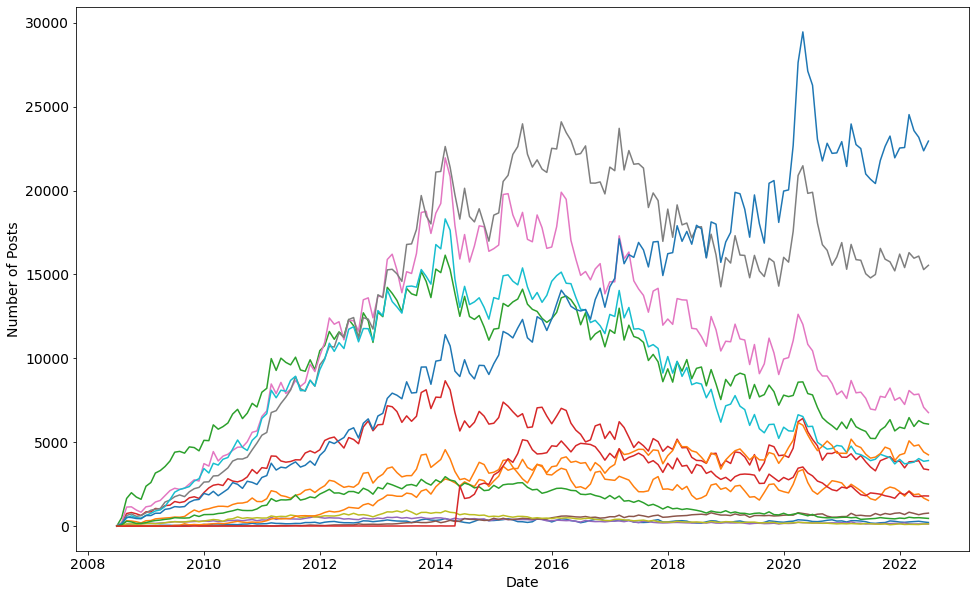

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim=(0, 35000)

#plot all languages using a for loop
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column])

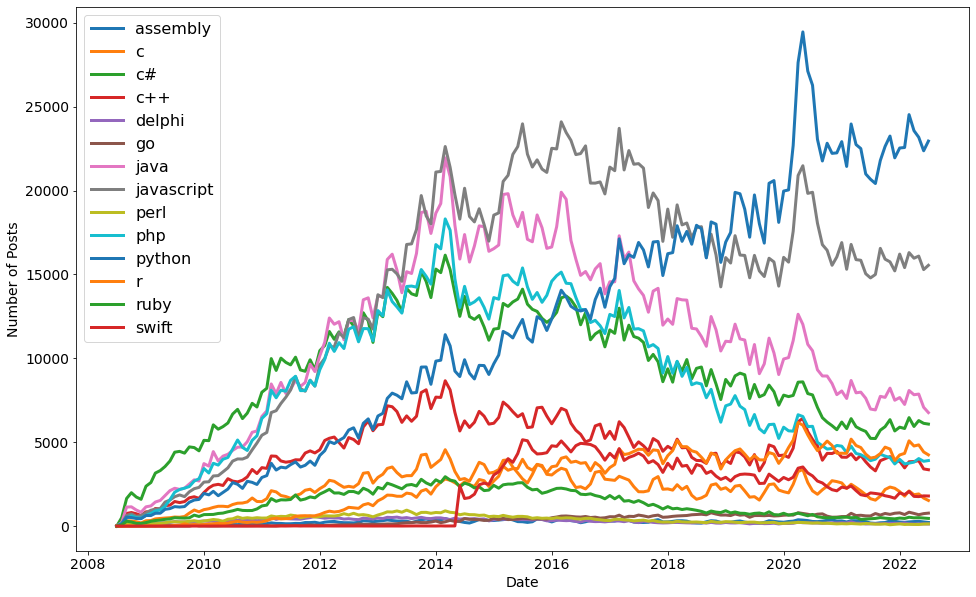

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim=(0, 35000)


for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], 
           linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

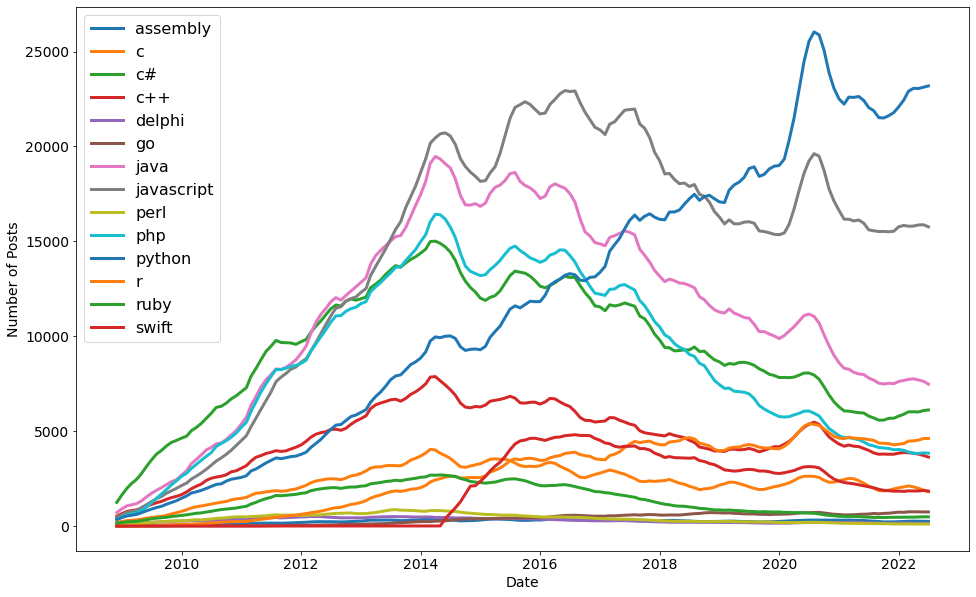

In [ ]:
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim=(0, 35000)


for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], 
           linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 